# Implementing a Binary DNN Classifier for Signal vs Background Classification
# gg vs qq channel | all features

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
from pathlib import Path
import sys
import pickle
import mplhep as hep
plt.style.use(hep.style.ATLAS)
FilePath='/data/dust/user/vtinari/'

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# TensorFlow/Keras
import tensorflow as tf
import keras
from tensorflow.keras import layers, models

print(f"TensorFlow version: {tf.__version__}")
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")

2025-08-29 14:51:45.914514: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-29 14:51:49.136273: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-29 14:51:55.721457: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-29 14:51:55.721524: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-29 14:51:55.924935: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

TensorFlow version: 2.15.0
GPU Available: []


In [2]:
# Load DataFrame from pickle file

start_time = time.time()
df = pd.read_pickle(FilePath+'df_147.pkl')
creation_time = time.time() - start_time

print(f"\n⚡ Creation completed in {creation_time:.4f} seconds")


⚡ Creation completed in 3.1208 seconds


In [3]:
# Load the weight array from the saved numpy file
weightarr = np.load(FilePath+'weightarr_147.npy')

print(f"✅ Successfully loaded weightarr from weightarr.npy")
print(f"📊 Weight array shape: {weightarr.shape}")
print(f"📈 Weight range: [{weightarr.min():.6f}, {weightarr.max():.6f}]")
print(f"📊 Mean weight: {weightarr.mean():.6f}")
print(f"📊 Standard deviation: {weightarr.std():.6f}")
print(f"🔍 First 10 weights: {weightarr[:10]}")

✅ Successfully loaded weightarr from weightarr.npy
📊 Weight array shape: (6993962,)
📈 Weight range: [-738.317810, 738.317810]
📊 Mean weight: 730.744690
📊 Standard deviation: 87.979584
🔍 First 10 weights: [736.41705 736.41705 736.41705 736.41705 736.41705 736.41705 736.41705
 736.41705 736.41705 736.41705]


In [4]:
#Printing the df
df['weights_MC_NOSYS']=weightarr
df

,beta,ttbar_mass_cut,ttbar_betaz_cut_abs,ttbar_pT,jets_per_event,bbbar_deltaeta,bbbar_deltaR,ttbar_deltaeta,ttbar_deltaR,ttbar_D_variable,ttbar_Cos_han_variable,ttbar_CosTstar_had,ttbar_CosTstar_lep,prod_type,weights_MC_NOSYS
0,0.39923,392.062433,0.398179,12.382046,4,-1.042267,1.448826,-0.724520,2.529964,0.958254,-0.086836,0.915691,-0.915691,0,736.417053
1,0.490863,508.504530,0.489939,17.572344,6,-2.327678,3.701759,-2.695467,3.988313,0.399070,0.135140,0.872934,-0.872934,0,736.417053
2,0.890895,607.682560,0.848865,361.778410,6,-0.754266,0.951633,-0.644037,0.709210,0.525904,-0.583933,0.684902,-0.684902,0,736.417053
3,0.533994,324.272719,0.533319,10.291829,4,0.484760,0.685823,0.643596,2.848374,0.800833,0.501883,0.679722,-0.679722,0,736.417053
4,0.435009,386.861898,0.423122,43.392899,6,0.733303,2.931322,-0.515549,3.079294,0.040779,-0.019781,-0.050037,0.050037,0,736.417053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6993957,0.850421,485.472304,0.848818,48.163303,4,-0.249881,2.616455,-0.903294,3.090659,0.890591,-0.732383,0.482294,-0.482294,0,-734.972900
6993958,0.467117,557.557079,0.465124,27.176550,4,-1.747923,3.049403,-2.752670,3.968701,0.139300,-0.435740,-0.920084,0.920084,0,734.972900
6993959,0.853835,382.708370,0.638078,417.124535,8,0.019076,0.483894,0.341386,0.959223,0.786415,0.699194,0.518878,-0.518878,0,734.972900
6993960,0.295325,560.516642,0.117036,159.076706,4,1.751434,3.140788,1.040123,3.156105,-0.122027,-0.876136,-0.995346,0.995346,0,734.972900


In [5]:
len(df['weights_MC_NOSYS'][df['weights_MC_NOSYS']<0])

#Some info about Mc weights
print("=" * 80)
print(f'------------------------------ Informative panel -------------------------------')
print("=" * 80)
print(f"| Total number of SGN events : {len(df[df['prod_type']==0])} \t\t\t\t\t\t|")
print(f"| Total number of BCK events : {len(df[df['prod_type']==1])} \t\t\t\t\t\t|")
print("=" * 80)
print(f"| Total number of SGN MC weights < 0 : {len(df['weights_MC_NOSYS'][df['prod_type']==0][df['weights_MC_NOSYS'][df['prod_type']==0]<0])} || relative fraction: {(len(df['weights_MC_NOSYS'][df['prod_type']==0][df['weights_MC_NOSYS'][df['prod_type']==0]<0])/len(df['weights_MC_NOSYS'][df['prod_type']==0]))*100:.3f}% \t|")
print(f"| Total number of BCK MC weights < 0 : {len(df['weights_MC_NOSYS'][df['prod_type']==1][df['weights_MC_NOSYS'][df['prod_type']==1]<0])} || relative fraction: {(len(df['weights_MC_NOSYS'][df['prod_type']==1][df['weights_MC_NOSYS'][df['prod_type']==1]<0])/len(df['weights_MC_NOSYS'][df['prod_type']==1]))*100:.3f}% \t\t|")
print("=" * 80)

------------------------------ Informative panel -------------------------------
| Total number of SGN events : 6115099 						|
| Total number of BCK events : 253434 						|
| Total number of SGN MC weights < 0 : 24694 || relative fraction: 0.404% 	|
| Total number of BCK MC weights < 0 : 0 || relative fraction: 0.000% 		|


In [6]:
mask = df['weights_MC_NOSYS'] > 0
df_cut = df[mask]
df_cut

,beta,ttbar_mass_cut,ttbar_betaz_cut_abs,ttbar_pT,jets_per_event,bbbar_deltaeta,bbbar_deltaR,ttbar_deltaeta,ttbar_deltaR,ttbar_D_variable,ttbar_Cos_han_variable,ttbar_CosTstar_had,ttbar_CosTstar_lep,prod_type,weights_MC_NOSYS
0,0.39923,392.062433,0.398179,12.382046,4,-1.042267,1.448826,-0.724520,2.529964,0.958254,-0.086836,0.915691,-0.915691,0,736.417053
1,0.490863,508.504530,0.489939,17.572344,6,-2.327678,3.701759,-2.695467,3.988313,0.399070,0.135140,0.872934,-0.872934,0,736.417053
2,0.890895,607.682560,0.848865,361.778410,6,-0.754266,0.951633,-0.644037,0.709210,0.525904,-0.583933,0.684902,-0.684902,0,736.417053
3,0.533994,324.272719,0.533319,10.291829,4,0.484760,0.685823,0.643596,2.848374,0.800833,0.501883,0.679722,-0.679722,0,736.417053
4,0.435009,386.861898,0.423122,43.392899,6,0.733303,2.931322,-0.515549,3.079294,0.040779,-0.019781,-0.050037,0.050037,0,736.417053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6993956,0.070178,446.913413,0.017853,30.406673,6,-1.450205,1.452041,-3.179598,4.117525,0.655743,0.599634,0.431845,-0.431845,2,734.972900
6993958,0.467117,557.557079,0.465124,27.176550,4,-1.747923,3.049403,-2.752670,3.968701,0.139300,-0.435740,-0.920084,0.920084,0,734.972900
6993959,0.853835,382.708370,0.638078,417.124535,8,0.019076,0.483894,0.341386,0.959223,0.786415,0.699194,0.518878,-0.518878,0,734.972900
6993960,0.295325,560.516642,0.117036,159.076706,4,1.751434,3.140788,1.040123,3.156105,-0.122027,-0.876136,-0.995346,0.995346,0,734.972900


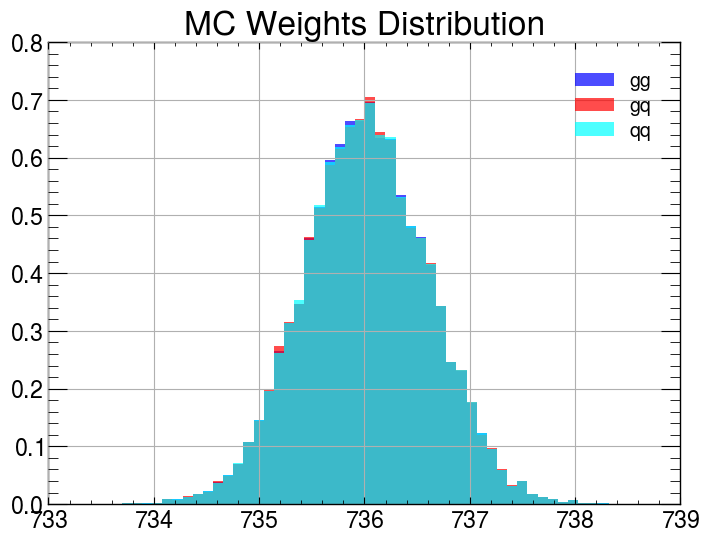

In [7]:
plt.hist(df_cut['weights_MC_NOSYS'][df_cut['prod_type']==0], bins=50, alpha=0.7, density=True, color='blue', label='gg')
plt.hist(df_cut['weights_MC_NOSYS'][df_cut['prod_type']==1], bins=50, alpha=0.7, density=True, color='red', label='gq')
plt.hist(df_cut['weights_MC_NOSYS'][df_cut['prod_type']==2], bins=50, alpha=0.7, density=True, color='cyan', label='qq')
plt.title('MC Weights Distribution')
plt.grid()
plt.legend()
plt.show()

### Binary Classification Labels:
- Signal (label 0) = True
- Background (label 1) = False

In [8]:
# Selecting columns associated to features
features = list(df_cut.columns[:13])
print("Feature columns are:\n", features)
display(df_cut[features].describe())

Feature columns are:
 ['beta', 'ttbar_mass_cut', 'ttbar_betaz_cut_abs', 'ttbar_pT', 'jets_per_event', 'bbbar_deltaeta', 'bbbar_deltaR', 'ttbar_deltaeta', 'ttbar_deltaR', 'ttbar_D_variable', 'ttbar_Cos_han_variable', 'ttbar_CosTstar_had', 'ttbar_CosTstar_lep']


,ttbar_mass_cut,ttbar_betaz_cut_abs,ttbar_pT,jets_per_event,bbbar_deltaeta,bbbar_deltaR,ttbar_deltaeta,ttbar_deltaR,ttbar_D_variable,ttbar_Cos_han_variable,ttbar_CosTstar_had,ttbar_CosTstar_lep
count,6.968890e+06,6.968890e+06,6.968890e+06,6.968890e+06,6.968890e+06,6.968890e+06,6.968890e+06,6.968890e+06,6.968890e+06,6.968890e+06,6.968890e+06,6.968890e+06
mean,5.661478e+02,4.762588e-01,7.253786e+01,4.804988e+00,-1.104467e-04,2.435731e+00,1.086097e-03,3.176216e+00,7.186361e-02,7.660237e-02,7.615047e-02,-7.615047e-02
std,2.067706e+02,2.600932e-01,7.985991e+01,1.016903e+00,1.511164e+00,8.688690e-01,1.846176e+00,8.106459e-01,5.733864e-01,5.734266e-01,6.291724e-01,6.291724e-01
min,1.900520e+02,5.298896e-08,6.173110e-03,4.000000e+00,-4.991252e+00,3.709910e-01,-1.263936e+01,2.007866e-03,-9.999998e-01,-9.999999e-01,-9.999997e-01,-9.999998e-01
25%,4.260603e+02,2.542894e-01,2.517009e+01,4.000000e+00,-1.060086e+00,1.838511e+00,-1.180309e+00,2.874607e+00,-4.109755e-01,-4.053100e-01,-5.069322e-01,-6.637043e-01
50%,5.151078e+02,4.921683e-01,4.688401e+01,5.000000e+00,-2.566189e-03,2.546130e+00,-1.730099e-03,3.135645e+00,1.094823e-01,1.162545e-01,1.385295e-01,-1.385295e-01
75%,6.476433e+02,7.021336e-01,8.869054e+01,5.000000e+00,1.056813e+00,3.048609e+00,1.179538e+00,3.491354e+00,5.723115e-01,5.773975e-01,6.637043e-01,5.069322e-01
max,4.846728e+03,9.834226e-01,2.057987e+03,1.700000e+01,4.995270e+00,5.817396e+00,1.181641e+01,1.270844e+01,1.000000e+00,9.999999e-01,9.999998e-01,9.999997e-01


In [9]:
mask_qq = (df_cut['prod_type'] == 0) | (df_cut['prod_type'] == 2)
df_qq=df_cut[mask_qq]
df_qq['prod_type'][df_qq['prod_type']==2]=1
df_qq

,beta,ttbar_mass_cut,ttbar_betaz_cut_abs,ttbar_pT,jets_per_event,bbbar_deltaeta,bbbar_deltaR,ttbar_deltaeta,ttbar_deltaR,ttbar_D_variable,ttbar_Cos_han_variable,ttbar_CosTstar_had,ttbar_CosTstar_lep,prod_type,weights_MC_NOSYS
0,0.39923,392.062433,0.398179,12.382046,4,-1.042267,1.448826,-0.724520,2.529964,0.958254,-0.086836,0.915691,-0.915691,0,736.417053
1,0.490863,508.504530,0.489939,17.572344,6,-2.327678,3.701759,-2.695467,3.988313,0.399070,0.135140,0.872934,-0.872934,0,736.417053
2,0.890895,607.682560,0.848865,361.778410,6,-0.754266,0.951633,-0.644037,0.709210,0.525904,-0.583933,0.684902,-0.684902,0,736.417053
3,0.533994,324.272719,0.533319,10.291829,4,0.484760,0.685823,0.643596,2.848374,0.800833,0.501883,0.679722,-0.679722,0,736.417053
4,0.435009,386.861898,0.423122,43.392899,6,0.733303,2.931322,-0.515549,3.079294,0.040779,-0.019781,-0.050037,0.050037,0,736.417053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6993956,0.070178,446.913413,0.017853,30.406673,6,-1.450205,1.452041,-3.179598,4.117525,0.655743,0.599634,0.431845,-0.431845,1,734.972900
6993958,0.467117,557.557079,0.465124,27.176550,4,-1.747923,3.049403,-2.752670,3.968701,0.139300,-0.435740,-0.920084,0.920084,0,734.972900
6993959,0.853835,382.708370,0.638078,417.124535,8,0.019076,0.483894,0.341386,0.959223,0.786415,0.699194,0.518878,-0.518878,0,734.972900
6993960,0.295325,560.516642,0.117036,159.076706,4,1.751434,3.140788,1.040123,3.156105,-0.122027,-0.876136,-0.995346,0.995346,0,734.972900


In [10]:
# Normalizing features with StandardScaler for better scaling

df_norm = df_qq.copy()

scaler = StandardScaler()
df_norm[features] = scaler.fit_transform(df_norm[features])

print("Observables mean after normalization")
print(df_norm[features].mean())
print("\nObservables std after normalization")
print(df_norm[features].std())
print("Len df after normalization")
print(len(df_norm))

Observables mean after normalization
beta                     -1.025776e-15
ttbar_mass_cut           -1.614720e-15
ttbar_betaz_cut_abs       4.823956e-16
ttbar_pT                  4.391819e-16
jets_per_event           -9.680077e-17
bbbar_deltaeta            5.319980e-18
bbbar_deltaR              2.766377e-15
ttbar_deltaeta           -2.236761e-18
ttbar_deltaR             -3.437062e-15
ttbar_D_variable         -1.320345e-16
ttbar_Cos_han_variable   -5.836318e-18
ttbar_CosTstar_had        3.130503e-16
ttbar_CosTstar_lep       -2.984341e-16
dtype: float64

Observables std after normalization
beta                      1.0
ttbar_mass_cut            1.0
ttbar_betaz_cut_abs       1.0
ttbar_pT                  1.0
jets_per_event            1.0
bbbar_deltaeta            1.0
bbbar_deltaR              1.0
ttbar_deltaeta            1.0
ttbar_deltaR              1.0
ttbar_D_variable          1.0
ttbar_Cos_han_variable    1.0
ttbar_CosTstar_had        1.0
ttbar_CosTstar_lep        1.0
dtype: float64

### Splitting the dataset into proper components for training, validation and testing (60:20:20)

In [11]:
# X_train_pd, X_tv, Y_train_pd, y_tv,W_train_pd,w_tv = train_test_split(df_norm[features], df_norm['prod_type'],df_norm['weights_MC_NOSYS'], train_size=0.6, shuffle=True, random_state=1234)
X_train_pd, X_tv, Y_train_pd, y_tv,W_train_pd,w_tv = train_test_split(df_norm[features], df_norm['prod_type'],df_norm['weights_MC_NOSYS'], train_size=0.6, shuffle=True, random_state=1234,stratify=df_norm['prod_type'])
X_test_pd, X_vali_pd, Y_test_pd, Y_vali_pd, W_test_pd,W_vali_pd = train_test_split(X_tv, y_tv,w_tv, train_size=0.5, shuffle=True, random_state=1234,stratify=y_tv)

print('X_train shape:', X_train_pd.shape)
print('Y_train shape:', Y_train_pd.shape)
print('W_train shape:', W_train_pd.shape)
print('X_vali shape:', X_vali_pd.shape)
print('Y_vali shape:', Y_vali_pd.shape)
print('W_vali shape:', W_vali_pd.shape)
print('X_test shape:', X_test_pd.shape)
print('Y_test shape:', Y_test_pd.shape)
print('W_test shape:', W_test_pd.shape)

X_train shape: (4029273, 13)
Y_train shape: (4029273,)
W_train shape: (4029273,)
X_vali shape: (1343092, 13)
Y_vali shape: (1343092,)
W_vali shape: (1343092,)
X_test shape: (1343091, 13)
Y_test shape: (1343091,)
W_test shape: (1343091,)


In [12]:
# Rescale weights separately for signal and background classes for training, validation, and testing sets
print("🔄 Rescaling weights separately for signal and background classes in each dataset split")
print("="*90)

# Function to rescale weights separately for signal and background within a dataset
def rescale_weights_by_class(weights, labels):
    """
    Rescale weights separately for signal (0) and background (1) classes
    so that each class has weights summing to 1.0
    """
    rescaled_weights =np.zeros(len(weights), dtype=np.float32)
    
    # Create masks for signal (0) and background (1) classes
    signal_mask = (labels == 0)
    background_mask = (labels == 1)
    
    # Calculate sum of weights for each class
    signal_weight_sum = weights[signal_mask].sum()
    background_weight_sum = weights[background_mask].sum()
    
    # Rescale weights: weight/sum(weights) for each class separately
    if signal_weight_sum > 0:
        rescaled_weights[signal_mask] = np.array(weights[signal_mask] / signal_weight_sum,dtype=np.float32)
    if background_weight_sum > 0:
        rescaled_weights[background_mask] = np.array(weights[background_mask] / background_weight_sum,dtype=np.float32)

    return rescaled_weights, signal_weight_sum, background_weight_sum

# Store original weights for reference
original_train_weights = W_train_pd.copy()
original_vali_weights = W_vali_pd.copy()
original_test_weights = W_test_pd.copy()

print(f"📊 Dataset splits overview:")
print(f"   Training set: {len(original_train_weights):,} samples")
print(f"   Validation set: {len(original_vali_weights):,} samples")
print(f"   Testing set: {len(original_test_weights):,} samples")
print(f"   Total: {len(original_train_weights) + len(original_vali_weights) + len(original_test_weights):,} samples")

# === TRAINING SET RESCALING ===
print(f"\n🔧 TRAINING SET RESCALING:")
print("-" * 50)

# Get class distribution for training set
train_signal_mask = (Y_train_pd == 0)
train_background_mask = (Y_train_pd == 1)

print(f"   Signal events: {train_signal_mask.sum():,}")
print(f"   Background events: {train_background_mask.sum():,}")

# Rescale training weights
train_weights, train_signal_orig_sum, train_background_orig_sum = rescale_weights_by_class(
    original_train_weights, np.array(Y_train_pd)
)

print(f"   Original signal weight sum: {train_signal_orig_sum:.6f}")
print(f"   Original background weight sum: {train_background_orig_sum:.6f}")
print(f"   Rescaled signal weight sum: {train_weights[train_signal_mask].sum():.6f}")
print(f"   Rescaled background weight sum: {train_weights[train_background_mask].sum():.6f}")

# === VALIDATION SET RESCALING ===
print(f"\n🔧 VALIDATION SET RESCALING:")
print("-" * 50)

# Get class distribution for validation set
vali_signal_mask = (Y_vali_pd == 0)
vali_background_mask = (Y_vali_pd == 1)

print(f"   Signal events: {vali_signal_mask.sum():,}")
print(f"   Background events: {vali_background_mask.sum():,}")

# Rescale validation weights
vali_weights, vali_signal_orig_sum, vali_background_orig_sum = rescale_weights_by_class(
    original_vali_weights, np.array(Y_vali_pd)
)

print(f"   Original signal weight sum: {vali_signal_orig_sum:.6f}")
print(f"   Original background weight sum: {vali_background_orig_sum:.6f}")
print(f"   Rescaled signal weight sum: {vali_weights[vali_signal_mask].sum():.6f}")
print(f"   Rescaled background weight sum: {vali_weights[vali_background_mask].sum():.6f}")

# === TESTING SET RESCALING ===
print(f"\n🔧 TESTING SET RESCALING:")
print("-" * 50)

# Get class distribution for testing set
test_signal_mask = (Y_test_pd == 0)
test_background_mask = (Y_test_pd == 1)

print(f"   Signal events: {test_signal_mask.sum():,}")
print(f"   Background events: {test_background_mask.sum():,}")

# Rescale testing weights
test_weights, test_signal_orig_sum, test_background_orig_sum = rescale_weights_by_class(
    original_test_weights, np.array(Y_test_pd)
)

print(f"   Original signal weight sum: {test_signal_orig_sum:.6f}")
print(f"   Original background weight sum: {test_background_orig_sum:.6f}")
print(f"   Rescaled signal weight sum: {test_weights[test_signal_mask].sum():.6f}")
print(f"   Rescaled background weight sum: {test_weights[test_background_mask].sum():.6f}")

# === SUMMARY STATISTICS ===
print(f"\n📊 RESCALING SUMMARY:")
print("="*90)

datasets = ['Training', 'Validation', 'Testing']
signal_masks = [train_signal_mask, vali_signal_mask, test_signal_mask]
background_masks = [train_background_mask, vali_background_mask, test_background_mask]
rescaled_weights = [train_weights, vali_weights, test_weights]

for i, dataset in enumerate(datasets):
    signal_mask = signal_masks[i]
    background_mask = background_masks[i]
    weights = rescaled_weights[i]
    
    print(f"\n{dataset} Set:")
    print(f"   Signal weights - Range: [{weights[signal_mask].min():.8f}, {weights[signal_mask].max():.8f}]")
    print(f"   Signal weights - Mean: {weights[signal_mask].mean():.8f}")
    print(f"   Background weights - Range: [{weights[background_mask].min():.8f}, {weights[background_mask].max():.8f}]")
    print(f"   Background weights - Mean: {weights[background_mask].mean():.8f}")

print(f"\n✅ RESCALING COMPLETED SUCCESSFULLY!")
print(f"   🎯 Each class in each dataset split now has weights that sum to 1.0")
print(f"   🔬 This ensures balanced weighting within each class across different dataset splits")
print(f"   📊 Training, validation, and testing sets are independently normalized")
print(f"   ⚖️  Each class contributes equally within its respective dataset split")

🔄 Rescaling weights separately for signal and background classes in each dataset split
📊 Dataset splits overview:
   Training set: 4,029,273 samples
   Validation set: 1,343,092 samples
   Testing set: 1,343,091 samples
   Total: 6,715,456 samples

🔧 TRAINING SET RESCALING:
--------------------------------------------------
   Signal events: 3,654,242
   Background events: 375,031
   Original signal weight sum: 2689606144.000000
   Original background weight sum: 276031168.000000
   Rescaled signal weight sum: 0.999999
   Rescaled background weight sum: 1.000000

🔧 VALIDATION SET RESCALING:
--------------------------------------------------
   Signal events: 1,218,082
   Background events: 125,010
   Original signal weight sum: 896536320.000000
   Original background weight sum: 92010208.000000
   Rescaled signal weight sum: 1.000000
   Rescaled background weight sum: 1.000000

🔧 TESTING SET RESCALING:
--------------------------------------------------
   Signal events: 1,218,081
   Ba

In [13]:
# Check class distribution
unique, counts = np.unique(Y_train_pd, return_counts=True)
print("Class distribution:", dict(zip(unique, counts)))
print("Class percentages:", counts/len(Y_train_pd)*100)

Class distribution: {0: 3654242, 1: 375031}
Class percentages: [90.69234078  9.30765922]


In [14]:
# Check and fix data types for TensorFlow compatibility
print("Checking data types and shapes before training...")
print(f"X_train shape: {X_train_pd.shape}, type: {type(X_train_pd)}")
print(f"Y_train shape: {Y_train_pd.shape}, type: {type(Y_train_pd)}")
print(f"W_train shape: {train_weights.shape}, type: {type(train_weights)}")
print(f"X_vali shape: {X_vali_pd.shape}, type: {type(X_vali_pd)}")
print(f"Y_vali shape: {Y_vali_pd.shape}, type: {type(Y_vali_pd)}")
print(f"W_vali shape: {vali_weights.shape}, type: {type(vali_weights)}")

print(f"\nUnique values in Y_train: {np.unique(Y_train_pd)}")
print(f"Y_train dtypes: {Y_train_pd.dtypes if hasattr(Y_train_pd, 'dtypes') else 'N/A'}")

# Convert to numpy arrays with proper dtypes
X_train = np.array(X_train_pd, dtype=np.float32)
X_vali = np.array(X_vali_pd, dtype=np.float32)
X_test = np.array(X_test_pd, dtype=np.float32)

Y_train = np.array(Y_train_pd, dtype=np.float32)
Y_vali = np.array(Y_vali_pd, dtype=np.float32)
Y_test = np.array(Y_test_pd, dtype=np.float32)


print(f"\nAfter conversion:")
print(f"X_train shape: {X_train.shape}, dtype: {X_train.dtype}")
print(f"Y_train shape: {Y_train.shape}, dtype: {Y_train.dtype}")
print(f"W_train shape: {train_weights.shape}, dtype: {train_weights.dtype}")
print(f"X_vali shape: {X_vali.shape}, dtype: {X_vali.dtype}")
print(f"Y_vali shape: {Y_vali.shape}, dtype: {Y_vali.dtype}")
print(f"W_vali shape: {vali_weights.shape}, dtype: {vali_weights.dtype}")

print(f"\nUnique values in Y_train after conversion: {np.unique(Y_train)}")
print("✅ Data types converted successfully for TensorFlow compatibility!")

Checking data types and shapes before training...
X_train shape: (4029273, 13), type: <class 'pandas.core.frame.DataFrame'>
Y_train shape: (4029273,), type: <class 'pandas.core.series.Series'>
W_train shape: (4029273,), type: <class 'numpy.ndarray'>
X_vali shape: (1343092, 13), type: <class 'pandas.core.frame.DataFrame'>
Y_vali shape: (1343092,), type: <class 'pandas.core.series.Series'>
W_vali shape: (1343092,), type: <class 'numpy.ndarray'>

Unique values in Y_train: [0 1]
Y_train dtypes: object

After conversion:
X_train shape: (4029273, 13), dtype: float32
Y_train shape: (4029273,), dtype: float32
W_train shape: (4029273,), dtype: float32
X_vali shape: (1343092, 13), dtype: float32
Y_vali shape: (1343092,), dtype: float32
W_vali shape: (1343092,), dtype: float32

Unique values in Y_train after conversion: [0. 1.]
✅ Data types converted successfully for TensorFlow compatibility!


### DNN Architecture Definition

In [15]:
def build_dnn_model(input_shape, hidden_units, dropout_rate=0):
    """
    Build a DNN model for binary classification (Signal vs Background)
    
    Args:
        input_shape: Number of input features
        hidden_units: List of hidden layer sizes
        dropout_rate: Dropout rate for regularization
    """
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=(input_shape)))
    
    # Add hidden layers with dropout
    for units in hidden_units:
        model.add(layers.Dense(units, activation='relu'))
        model.add(layers.Dropout(dropout_rate))

    # Output layer for binary classification (single neuron with sigmoid)
    model.add(layers.Dense(1, activation='sigmoid'))
    
    return model

# Define model parameters
input_shape = X_train.shape[1]  # 13 features
hidden_units = [256,128,64, 32,16]  # Two hidden layers
dropout_rate = 0.1

# Build the model
model = build_dnn_model(input_shape, hidden_units, dropout_rate)

# Display model summary
print("Model Architecture:")
model.summary()

Model Architecture:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3584      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 

### Model Compilation and Training

In [16]:
# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    # optimizer='adam',
    loss='binary_crossentropy',  # For binary classification
    metrics=['accuracy'],
    weighted_metrics=['accuracy']
)

print("Model compiled successfully!")

Model compiled successfully!


In [17]:
# Train the model with rescaled Monte Carlo sample weights
print("🚀 Starting model training with rescaled MC sample weights...")
print("="*70)

start_time = time.time()

history = model.fit(
    X_train, Y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_vali, Y_vali, vali_weights), 
    sample_weight=train_weights, 
    verbose=1
)

training_time = time.time() - start_time
print(f"\n⚡ Training completed in {training_time:.2f} seconds")
print(f"📈 Final training accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"📊 Final validation accuracy: {history.history['val_accuracy'][-1]:.4f}")


🚀 Starting model training with rescaled MC sample weights...
Epoch 1/10
31479/31479 [==============================] - 268s 8ms/step - loss: 3.4369e-07 - accuracy: 0.6262 - weighted_accuracy: 0.5089 - val_loss: 1.0303e-06 - val_accuracy: 0.6126 - val_weighted_accuracy: 0.5218
Epoch 2/10
31479/31479 [==============================] - 265s 8ms/step - loss: 3.4324e-07 - accuracy: 0.5916 - weighted_accuracy: 0.5234 - val_loss: 1.0287e-06 - val_accuracy: 0.5566 - val_weighted_accuracy: 0.5459
Epoch 3/10
31479/31479 [==============================] - 259s 8ms/step - loss: 3.4277e-07 - accuracy: 0.5682 - weighted_accuracy: 0.5349 - val_loss: 1.0269e-06 - val_accuracy: 0.5394 - val_weighted_accuracy: 0.5552
Epoch 4/10
31479/31479 [==============================] - 258s 8ms/step - loss: 3.4224e-07 - accuracy: 0.5585 - weighted_accuracy: 0.5442 - val_loss: 1.0248e-06 - val_accuracy: 0.5417 - val_weighted_accuracy: 0.5608
Epoch 5/10
31479/31479 [==============================] - 258s 8ms/step - l

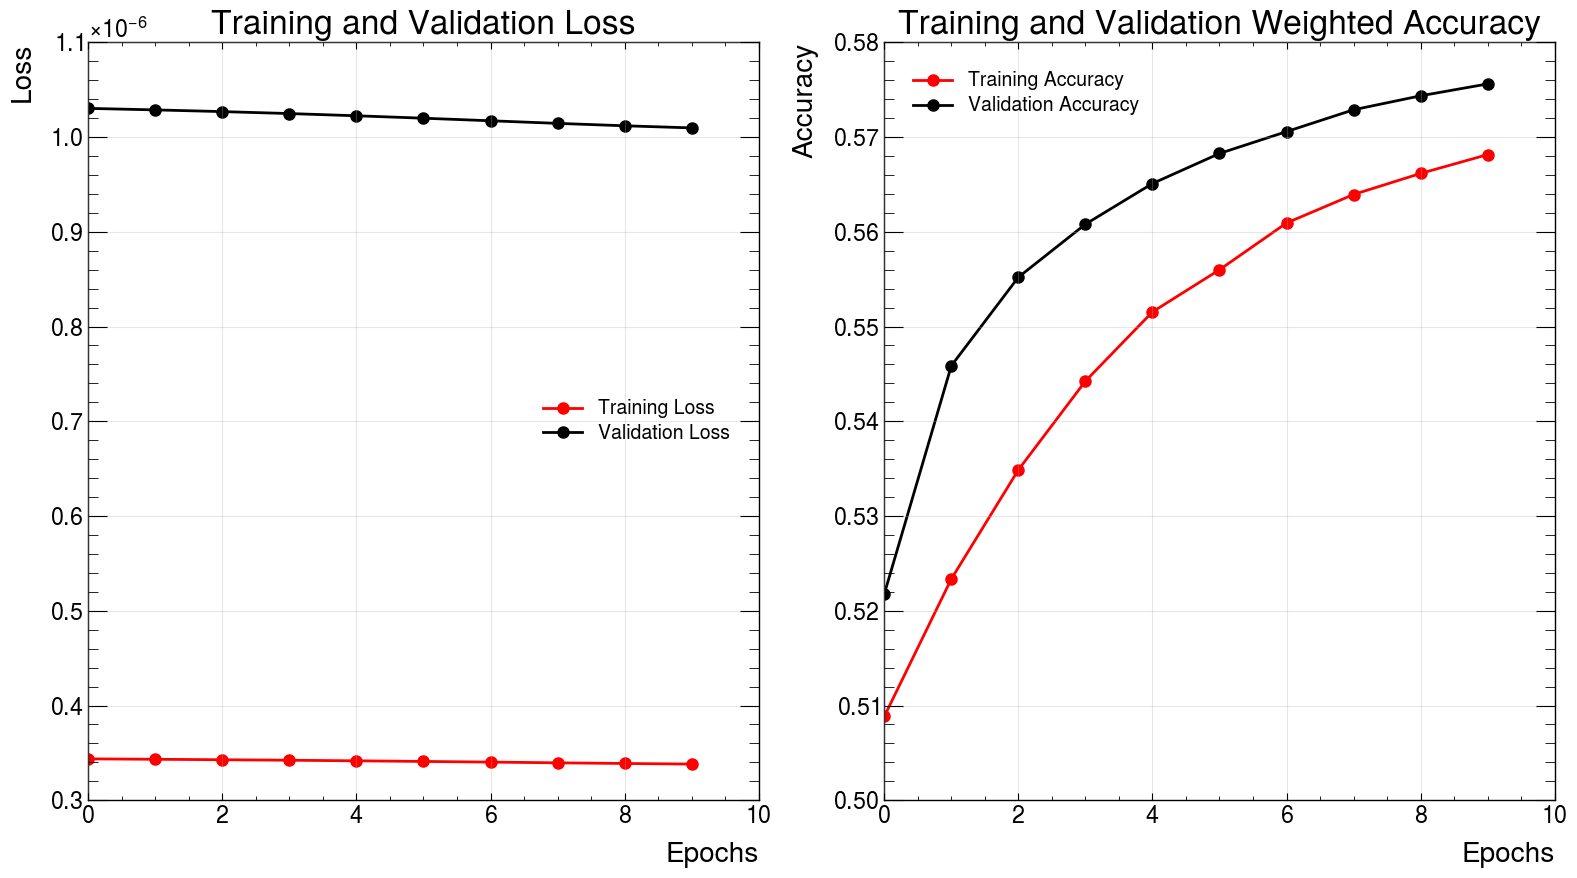


📊 Training Summary:
Epochs completed: 10
Best validation loss: 0.0000
Best weighted validation accuracy: 0.5756


In [18]:
# Plot training results (loss and accuracy vs epoch)
fig, axes = plt.subplots(1, 2, figsize=(16, 9))

# Plot training and validation loss
axes[0].plot(history.history['loss'], 'ro-', label='Training Loss')
axes[0].plot(history.history['val_loss'], 'ko-', label='Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training and Validation Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot training and validation accuracy
axes[1].plot(history.history['weighted_accuracy'], 'ro-', label='Training Accuracy')
axes[1].plot(history.history['val_weighted_accuracy'], 'ko-', label='Validation Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Training and Validation Weighted Accuracy')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print final metrics
print(f"\n📊 Training Summary:")
print(f"Epochs completed: {len(history.history['loss'])}")
print(f"Best validation loss: {min(history.history['val_loss']):.4f}")
print(f"Best weighted validation accuracy: {max(history.history['val_weighted_accuracy']):.4f}")

In [19]:
# Save the trained model
model.save('trained_dnn_model_weightedMC.h5')
print("✅ Model saved as 'trained_dnn_model_weightedMC.h5'")

✅ Model saved as 'trained_dnn_model_weightedMC.h5'


### Test Phase

In [20]:
# Test phase - evaluate model on test set with Monte Carlo weights
print("="*70)
print("BINARY CLASSIFICATION TEST SET EVALUATION WITH MC WEIGHTS")
print("="*70)

# Prepare test weights in the appropriate format
sample_weights_test = np.array(test_weights, dtype=np.float32)
Y_test_np = np.array(Y_test, dtype=np.float32)

print(f"🔧 Test data preparation:")
print(f"   Test samples: {len(X_test):,}")
print(f"   Test weights shape: {sample_weights_test.shape}")
print(f"   Y_test_np shape: {Y_test_np.shape}")

# Verify dimensions match
if X_test.shape[0] != sample_weights_test.shape[0]:
    raise ValueError(f"Test data and weights dimension mismatch: {X_test.shape[0]} vs {sample_weights_test.shape[0]}")
print("✅ Test dimensions match correctly!")

print(f"\n📊 Test weight statistics:")
print(f"   Test weights sum: {sample_weights_test.sum():.6f}")
print(f"   Test weights range: [{sample_weights_test.min():.8f}, {sample_weights_test.max():.8f}]")

# Show weight distribution for test classes
signal_mask_test = (Y_test_np == 0)
background_mask_test = (Y_test_np == 1)
signal_test_weights_sum = sample_weights_test[signal_mask_test].sum()
background_test_weights_sum = sample_weights_test[background_mask_test].sum()

print(f"\n📊 Test set weight distribution:")
print(f"   Signal samples: {signal_mask_test.sum():,} with total weight: {signal_test_weights_sum:.6f}")
print(f"   Background samples: {background_mask_test.sum():,} with total weight: {background_test_weights_sum:.6f}")

# Evaluate on test set with sample weights
print(f"\n🚀 Running weighted evaluation...")
test_loss, test_accuracy_regular, test_weighted_accuracy = model.evaluate(
    X_test, Y_test_np, 
    sample_weight=sample_weights_test,
    verbose=0
)

# Also evaluate without weights for comparison
test_loss_unweighted, test_accuracy_unweighted_regular, test_accuracy_unweighted = model.evaluate(X_test, Y_test_np, verbose=0)

print(f"\n📊 TEST SET EVALUATION RESULTS:")
print(f"   Weighted Test Loss: {test_loss:.4f}")
print(f"   Weighted Test Accuracy: {test_weighted_accuracy:.4f} ({test_weighted_accuracy:.1%})")
print(f"   Unweighted Test Loss: {test_loss_unweighted:.4f}")
print(f"   Unweighted Test Accuracy: {test_accuracy_unweighted:.4f} ({test_accuracy_unweighted:.1%})")
print(f"   Accuracy Difference: {(test_weighted_accuracy - test_accuracy_unweighted)*100:+.2f} percentage points")

# Get predictions for all test samples
print(f"\n📊 Getting predictions for {len(X_test)} test samples...")
test_predictions_proba = model.predict(X_test, verbose=0).flatten()  # Binary probabilities (signal probability)
test_predictions = (test_predictions_proba > 0.5).astype(int)  # Convert to binary predictions

print(f"✅ Predictions completed!")
print(f"📊 Prediction probabilities shape: {test_predictions_proba.shape}")
print(f"📊 Predicted classes shape: {test_predictions.shape}")
print(f"📊 Signal probability range: [{test_predictions_proba.min():.3f}, {test_predictions_proba.max():.3f}]")

print(f"\n🎯 Evaluation approach used:")
print(f"   ✅ USING sample_weight (individual rescaled MC weights per test sample)")
print(f"   📊 Each test sample contributes according to its rescaled MC weight")
print(f"   🔬 Weighted accuracy accounts for Monte Carlo statistical importance")

# Store test weights for later use in analysis
test_accuracy = test_weighted_accuracy  # Use weighted accuracy as the main test accuracy

BINARY CLASSIFICATION TEST SET EVALUATION WITH MC WEIGHTS
🔧 Test data preparation:
   Test samples: 1,343,091
   Test weights shape: (1343091,)
   Y_test_np shape: (1343091,)
✅ Test dimensions match correctly!

📊 Test weight statistics:
   Test weights sum: 2.000000
   Test weights range: [0.00000082, 0.00000802]

📊 Test set weight distribution:
   Signal samples: 1,218,081 with total weight: 1.000000
   Background samples: 125,010 with total weight: 1.000000

🚀 Running weighted evaluation...

📊 TEST SET EVALUATION RESULTS:
   Weighted Test Loss: 0.0000
   Weighted Test Accuracy: 0.5759 (57.6%)
   Unweighted Test Loss: 0.6748
   Unweighted Test Accuracy: 0.5702 (57.0%)
   Accuracy Difference: +0.58 percentage points

📊 Getting predictions for 1343091 test samples...
✅ Predictions completed!
📊 Prediction probabilities shape: (1343091,)
📊 Predicted classes shape: (1343091,)
📊 Signal probability range: [0.125, 0.606]

🎯 Evaluation approach used:
   ✅ USING sample_weight (individual rescal

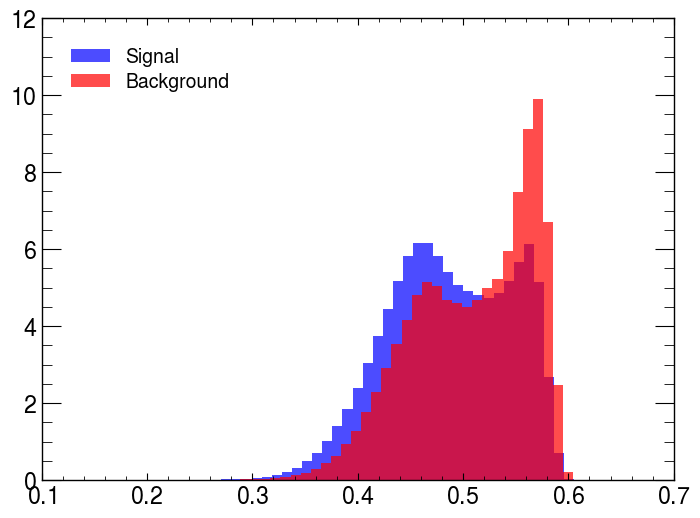

In [21]:
plt.hist(test_predictions_proba[Y_test == 0], bins=50, alpha=0.7,density=True, color='blue', label='Signal')
plt.hist(test_predictions_proba[Y_test == 1], bins=50, alpha=0.7,density=True, color='red', label='Background')
plt.legend()

In [22]:
# Detailed Analysis: Impact of Monte Carlo Weights on Test Metrics
print("="*70)
print("WEIGHTED vs UNWEIGHTED METRICS ANALYSIS")
print("="*70)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate metrics with and without weights
print("🔍 Computing detailed metrics comparison...")

# Unweighted metrics (standard approach)
accuracy_unweighted = accuracy_score(Y_test, test_predictions)
precision_unweighted = precision_score(Y_test, test_predictions, average='binary', pos_label=1)
recall_unweighted = recall_score(Y_test, test_predictions, average='binary', pos_label=1)
f1_unweighted = f1_score(Y_test, test_predictions, average='binary', pos_label=1)

# Weighted metrics (Monte Carlo weighted approach)
accuracy_weighted = accuracy_score(Y_test, test_predictions, sample_weight=sample_weights_test)
precision_weighted = precision_score(Y_test, test_predictions, sample_weight=sample_weights_test, average='binary', pos_label=1)
recall_weighted = recall_score(Y_test, test_predictions, sample_weight=sample_weights_test, average='binary', pos_label=1)
f1_weighted = f1_score(Y_test, test_predictions, sample_weight=sample_weights_test, average='binary', pos_label=1)

print(f"\n📊 METRICS COMPARISON:")
print(f"{'Metric':<20} {'Unweighted':<15} {'MC Weighted':<15} {'Difference':<15}")
print("-" * 75)
print(f"{'Accuracy':<20} {accuracy_unweighted:<15.4f} {accuracy_weighted:<15.4f} {(accuracy_weighted-accuracy_unweighted)*100:+8.2f}pp")
print(f"{'Precision':<20} {precision_unweighted:<15.4f} {precision_weighted:<15.4f} {(precision_weighted-precision_unweighted)*100:+8.2f}pp")
print(f"{'Recall':<20} {recall_unweighted:<15.4f} {recall_weighted:<15.4f} {(recall_weighted-recall_unweighted)*100:+8.2f}pp")
print(f"{'F1-Score':<20} {f1_unweighted:<15.4f} {f1_weighted:<15.4f} {(f1_weighted-f1_unweighted)*100:+8.2f}pp")

# Confusion matrices with and without weights
cm_unweighted = confusion_matrix(Y_test_np, test_predictions)
cm_weighted = confusion_matrix(Y_test_np, test_predictions, sample_weight=sample_weights_test)

print(f"\n📊 CONFUSION MATRICES:")
print(f"Unweighted Confusion Matrix:")
print(f"   True\\Pred    Signal  Background")
print(f"   Signal      {cm_unweighted[0,0]:6d}    {cm_unweighted[0,1]:6d}")
print(f"   Background  {cm_unweighted[1,0]:6d}    {cm_unweighted[1,1]:6d}")

print(f"\nWeighted Confusion Matrix (Monte Carlo):")
print(f"   True\\Pred    Signal  Background")
print(f"   Signal      {cm_weighted[0,0]:8.3f}  {cm_weighted[0,1]:8.3f}")
print(f"   Background  {cm_weighted[1,0]:8.3f}  {cm_weighted[1,1]:8.3f}")

# Analyze the impact of weights on different classes
print(f"\n🔬 WEIGHT IMPACT ANALYSIS:")
print(f"Signal class performance:")
signal_correct = (Y_test_np == 0) & (test_predictions == 0)
signal_incorrect = (Y_test_np == 0) & (test_predictions == 1)
signal_weights_correct = sample_weights_test[signal_correct].sum()
signal_weights_incorrect = sample_weights_test[signal_incorrect].sum()
signal_total_weight = sample_weights_test[Y_test_np == 0].sum()

print(f"   Correctly classified signal weight: {signal_weights_correct:.6f} ({signal_weights_correct/signal_total_weight*100:.1f}%)")
print(f"   Incorrectly classified signal weight: {signal_weights_incorrect:.6f} ({signal_weights_incorrect/signal_total_weight*100:.1f}%)")

print(f"\nBackground class performance:")
background_correct = (Y_test == 1) & (test_predictions == 1)
background_incorrect = (Y_test == 1) & (test_predictions == 0)
background_weights_correct = sample_weights_test[background_correct].sum()
background_weights_incorrect = sample_weights_test[background_incorrect].sum()
background_total_weight = sample_weights_test[Y_test == 1].sum()

print(f"   Correctly classified background weight: {background_weights_correct:.6f} ({background_weights_correct/background_total_weight*100:.1f}%)")
print(f"   Incorrectly classified background weight: {background_weights_incorrect:.6f} ({background_weights_incorrect/background_total_weight*100:.1f}%)")

print(f"\n💡 KEY INSIGHTS:")
print(f"   🎯 Weighted accuracy represents the Monte Carlo statistical importance")
print(f"   📊 Each test sample contributes proportionally to its physics significance")
print(f"   🔬 Differences show how MC weights affect classification performance assessment")
print(f"   ⚖️  Weighted metrics are more representative for physics analysis conclusions")

WEIGHTED vs UNWEIGHTED METRICS ANALYSIS
🔍 Computing detailed metrics comparison...

📊 METRICS COMPARISON:
Metric               Unweighted      MC Weighted     Difference     
---------------------------------------------------------------------------
Accuracy             0.5702          0.5760             +0.58pp
Precision            0.1219          0.5749            +45.30pp
Recall               0.5831          0.5831             -0.00pp
F1-Score             0.2016          0.5790            +37.74pp

📊 CONFUSION MATRICES:
Unweighted Confusion Matrix:
   True\Pred    Signal  Background
   Signal      692880    525201
   Background   52113     72897

Weighted Confusion Matrix (Monte Carlo):
   True\Pred    Signal  Background
   Signal         0.569     0.431
   Background     0.417     0.583

🔬 WEIGHT IMPACT ANALYSIS:
Signal class performance:
   Correctly classified signal weight: 0.568829 (56.9%)
   Incorrectly classified signal weight: 0.431171 (43.1%)

Background class performance:

BINARY CLASSIFICATION TEST SET RESULTS

Classification Report:
                precision    recall  f1-score   support

    Signal (0)       0.93      0.57      0.71   1218081
Background (1)       0.12      0.58      0.20    125010

      accuracy                           0.57   1343091
     macro avg       0.53      0.58      0.45   1343091
  weighted avg       0.85      0.57      0.66   1343091



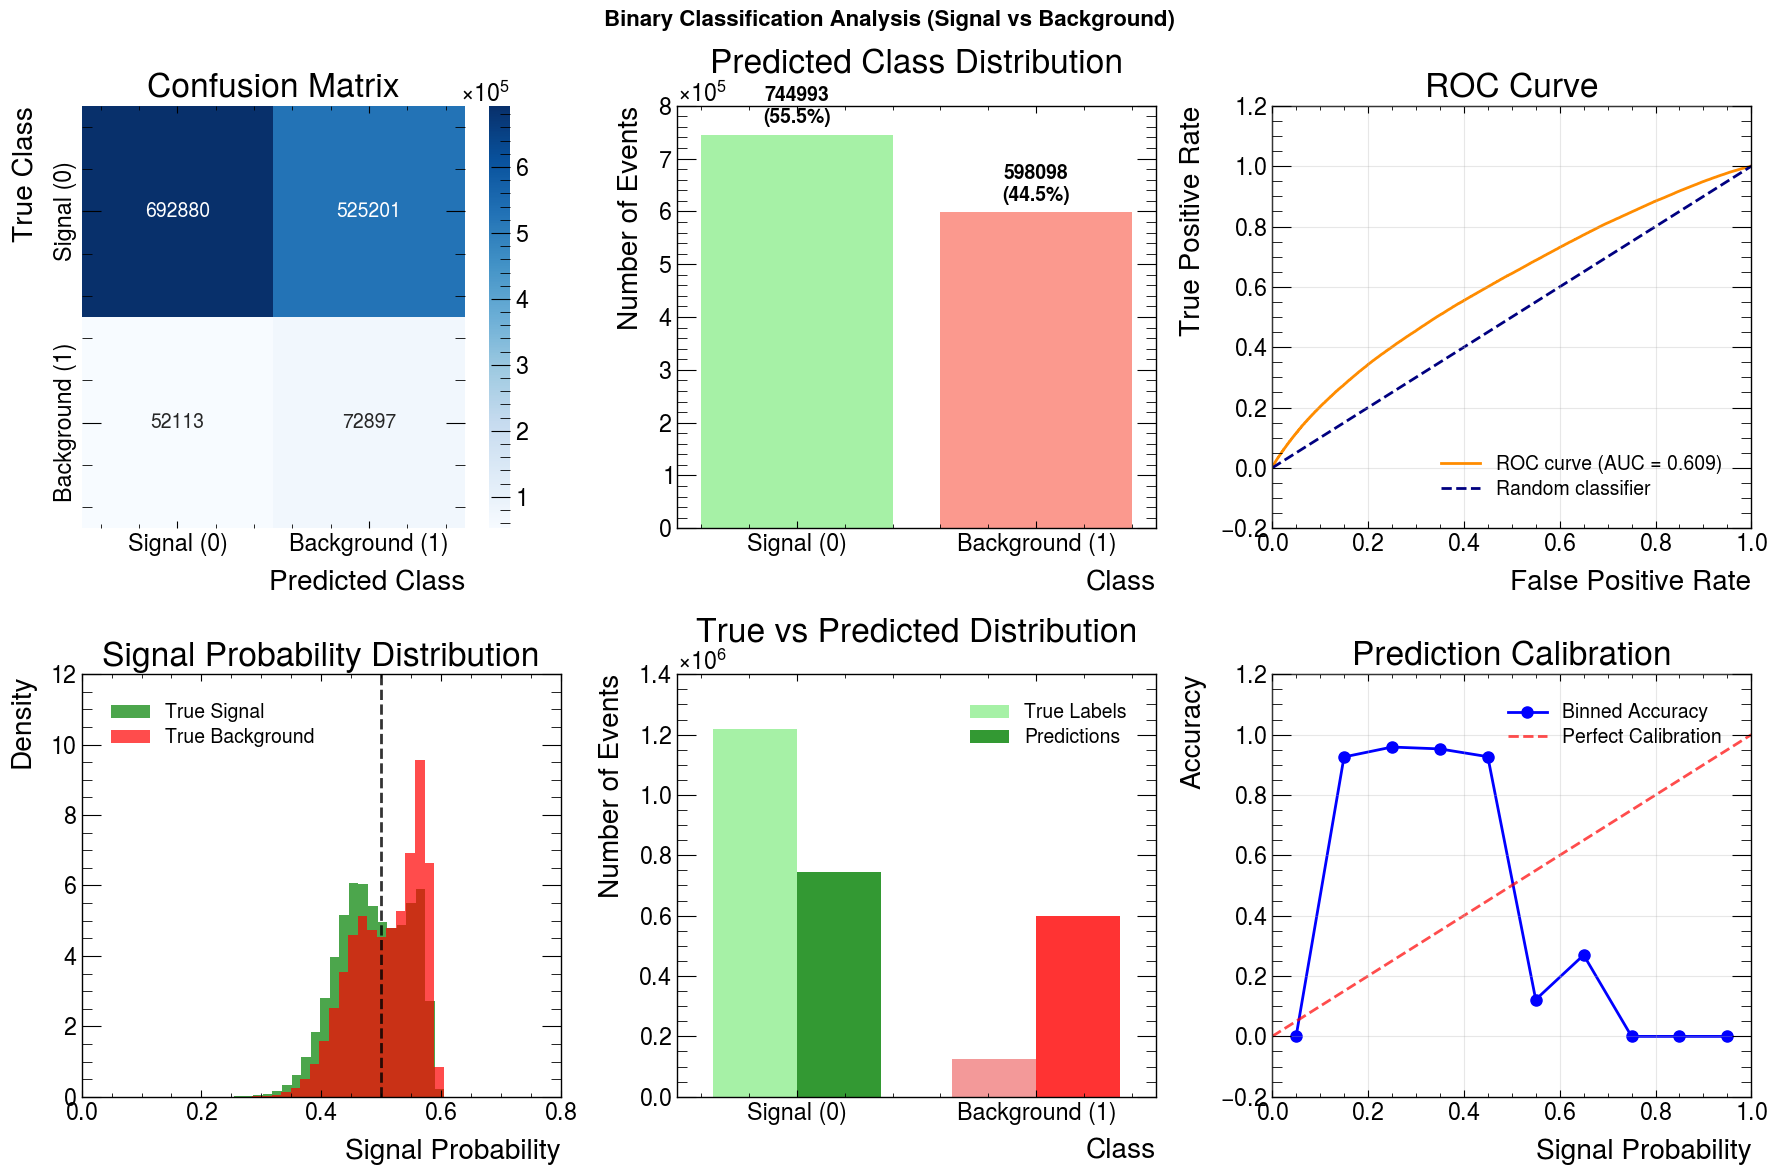


SUMMARY STATISTICS:
Total test samples: 1343091
Overall test accuracy: 0.5702
ROC AUC Score: 0.6093
Average signal probability: 0.4891

DETAILED BINARY CLASSIFICATION METRICS:
True Positives (Signal correctly identified): 72897
True Negatives (Background correctly identified): 692880
False Positives (Background misidentified as Signal): 525201
False Negatives (Signal misidentified as Background): 52113
Precision (Signal Purity): 0.1219
Recall (Signal Efficiency): 0.5831
Specificity (Background Rejection): 0.5688
F1-Score: 0.2016

CLASS DISTRIBUTION COMPARISON:
True Signal: 1218081 (90.7%)
True Background: 125010 (9.3%)
Predicted Signal: 744993 (55.5%)
Predicted Background: 598098 (44.5%)


In [23]:
# Comprehensive Test Set Binary Classification Analysis and Visualization
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns


# Class names for better visualization
class_names = ['Signal (0)', 'Background (1)']

print("="*60)
print("BINARY CLASSIFICATION TEST SET RESULTS")
print("="*60)

# 1. Overall Classification Report
print("\nClassification Report:")
print(classification_report(Y_test, test_predictions, target_names=class_names))

# Create a comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Binary Classification Analysis (Signal vs Background)', fontsize=16, fontweight='bold')

# 2. Confusion Matrix
cm = confusion_matrix(Y_test, test_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names, ax=axes[0,0])
axes[0,0].set_title('Confusion Matrix')
axes[0,0].set_xlabel('Predicted Class')
axes[0,0].set_ylabel('True Class')

# 3. Predicted Class Distribution
pred_counts = np.bincount(test_predictions, minlength=2)
pred_percentages = pred_counts / len(test_predictions) * 100

axes[0,1].bar(range(2), pred_counts, color=['lightgreen', 'salmon'], alpha=0.8)
axes[0,1].set_title('Predicted Class Distribution')
axes[0,1].set_xlabel('Class')
axes[0,1].set_ylabel('Number of Events')
axes[0,1].set_xticks(range(2))
axes[0,1].set_xticklabels(class_names)

# Add percentage labels on bars
for i, (count, pct) in enumerate(zip(pred_counts, pred_percentages)):
    axes[0,1].text(i, count + max(pred_counts)*0.02, f'{count}\n({pct:.1f}%)', 
                   ha='center', va='bottom', fontweight='bold')

# 4. ROC Curve
fpr, tpr, _ = roc_curve(Y_test, test_predictions_proba)
roc_auc = auc(fpr, tpr)

axes[0,2].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
axes[0,2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
axes[0,2].set_xlabel('False Positive Rate')
axes[0,2].set_ylabel('True Positive Rate')
axes[0,2].set_title('ROC Curve')
axes[0,2].legend(loc="lower right")
axes[0,2].grid(True, alpha=0.3)

# 5. Signal Probability Distribution
axes[1,0].hist(test_predictions_proba[Y_test == 0], bins=30, alpha=0.7, 
               color='green', label='True Signal', density=True)
axes[1,0].hist(test_predictions_proba[Y_test == 1], bins=30, alpha=0.7, 
               color='red', label='True Background', density=True)
axes[1,0].set_title('Signal Probability Distribution')
axes[1,0].set_xlabel('Signal Probability')
axes[1,0].set_ylabel('Density')
axes[1,0].legend()
axes[1,0].axvline(0.5, color='black', linestyle='--', alpha=0.8, label='Decision Threshold')

# 6. True vs Predicted Distribution Comparison
true_counts = np.bincount(Y_test.astype(int), minlength=2)
x = np.arange(2)
width = 0.35

axes[1,1].bar(x - width/2, true_counts, width, label='True Labels', 
              color=['lightgreen', 'lightcoral'], alpha=0.8)
axes[1,1].bar(x + width/2, pred_counts, width, label='Predictions', 
              color=['green', 'red'], alpha=0.8)
axes[1,1].set_title('True vs Predicted Distribution')
axes[1,1].set_xlabel('Class')
axes[1,1].set_ylabel('Number of Events')
axes[1,1].set_xticks(x)
axes[1,1].set_xticklabels(class_names)
axes[1,1].legend()

# 7. Prediction Confidence vs Accuracy
bins = np.linspace(0, 1, 11)
bin_centers = (bins[:-1] + bins[1:]) / 2
bin_accuracies = []

for i in range(len(bins)-1):
    mask = (test_predictions_proba >= bins[i]) & (test_predictions_proba < bins[i+1])
    if np.sum(mask) > 0:
        bin_acc = np.mean(test_predictions[mask] == Y_test[mask])
        bin_accuracies.append(bin_acc)
    else:
        bin_accuracies.append(0)

axes[1,2].plot(bin_centers, bin_accuracies, 'o-', color='blue', label='Binned Accuracy')
axes[1,2].plot([0, 1], [0, 1], '--', color='red', alpha=0.7, label='Perfect Calibration')
axes[1,2].set_xlabel('Signal Probability')
axes[1,2].set_ylabel('Accuracy')
axes[1,2].set_title('Prediction Calibration')
axes[1,2].legend()
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nSUMMARY STATISTICS:")
print(f"Total test samples: {len(Y_test)}")
print(f"Overall test accuracy: {np.mean(test_predictions == Y_test):.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Average signal probability: {np.mean(test_predictions_proba):.4f}")

# Calculate additional metrics
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
f1_score = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

print(f"\nDETAILED BINARY CLASSIFICATION METRICS:")
print(f"True Positives (Signal correctly identified): {tp}")
print(f"True Negatives (Background correctly identified): {tn}")
print(f"False Positives (Background misidentified as Signal): {fp}")
print(f"False Negatives (Signal misidentified as Background): {fn}")
print(f"Precision (Signal Purity): {precision:.4f}")
print(f"Recall (Signal Efficiency): {recall:.4f}")
print(f"Specificity (Background Rejection): {specificity:.4f}")
print(f"F1-Score: {f1_score:.4f}")

print(f"\nCLASS DISTRIBUTION COMPARISON:")
print(f"True Signal: {true_counts[0]} ({true_counts[0]/len(Y_test)*100:.1f}%)")
print(f"True Background: {true_counts[1]} ({true_counts[1]/len(Y_test)*100:.1f}%)")
print(f"Predicted Signal: {pred_counts[0]} ({pred_counts[0]/len(test_predictions)*100:.1f}%)")
print(f"Predicted Background: {pred_counts[1]} ({pred_counts[1]/len(test_predictions)*100:.1f}%)")

In [24]:
# Create comprehensive test results DataFrame for binary classification with Monte Carlo weights
print("="*80)
print("CREATING WEIGHTED BINARY CLASSIFICATION TEST RESULTS DATAFRAME")
print("="*80)

# Convert test features back to DataFrame with original feature names
test_features_df = pd.DataFrame(X_test.values if hasattr(X_test, 'values') else X_test, columns=features)

# Add true and predicted labels
test_results_df = test_features_df.copy()
test_results_df['true_label'] = Y_test_np
test_results_df['predicted_label'] = test_predictions

# Add Monte Carlo weights
test_results_df['mc_weight'] = sample_weights_test
test_results_df['mc_weight_original'] = test_weights  # Original weights before rescaling

# Add prediction probabilities
test_results_df['signal_probability'] = test_predictions_proba  # Probability of being signal (class 0)
test_results_df['background_probability'] = 1 - test_predictions_proba  # Probability of being background (class 1)

# Add prediction correctness and confidence
test_results_df['prediction_correct'] = (Y_test_np == test_predictions)
test_results_df['prediction_confidence'] = np.where(test_predictions == 0, 
                                                    test_predictions_proba, 
                                                    1 - test_predictions_proba)

# Add weighted contribution (weight * correctness)
test_results_df['weighted_contribution'] = test_results_df['mc_weight'] * test_results_df['prediction_correct'].astype(float)

# Add class names for better readability
class_name_map = {0: 'Signal', 1: 'Background'}
test_results_df['true_class_name'] = test_results_df['true_label'].map(class_name_map)
test_results_df['predicted_class_name'] = test_results_df['predicted_label'].map(class_name_map)

# Add boolean interpretation (True for Signal, False for Background)
test_results_df['true_is_signal'] = (test_results_df['true_label'] == 0)
test_results_df['predicted_is_signal'] = (test_results_df['predicted_label'] == 0)

# Display DataFrame info
print(f"✅ Weighted binary classification test results DataFrame created successfully!")
print(f"📊 Shape: {test_results_df.shape}")
print(f"📋 Columns: {list(test_results_df.columns)}")

print(f"\n🔍 DataFrame Summary:")
print(f"Features columns: {len(features)} ({features[0]} to {features[-1]})")
print(f"Label columns: true_label, predicted_label, true_class_name, predicted_class_name")
print(f"Probability columns: signal_probability, background_probability, prediction_confidence") 
print(f"Weight columns: mc_weight (rescaled), mc_weight_original, weighted_contribution")
print(f"Boolean columns: true_is_signal, predicted_is_signal")
print(f"Analysis columns: prediction_correct")

# Show first few rows
print(f"\n📋 First 5 rows of the weighted test results:")
display(test_results_df.head())

# Show weighted statistics
total_weighted_correct = test_results_df['weighted_contribution'].sum()
total_weight = test_results_df['mc_weight'].sum()
weighted_accuracy_check = total_weighted_correct / total_weight

print(f"\n📊 Weighted Statistics:")
print(f"Total samples: {len(test_results_df):,}")
print(f"Correct predictions: {test_results_df['prediction_correct'].sum()} / {len(test_results_df)} ({test_results_df['prediction_correct'].mean():.1%})")
print(f"Total MC weight: {total_weight:.6f}")
print(f"Total weighted contribution: {total_weighted_correct:.6f}")
print(f"Weighted accuracy (manual check): {weighted_accuracy_check:.4f}")
print(f"Average signal probability: {test_results_df['signal_probability'].mean():.3f}")
print(f"Average prediction confidence: {test_results_df['prediction_confidence'].mean():.3f}")

# Weight distribution analysis
print(f"\n📊 Weight Distribution Analysis:")
signal_df = test_results_df[test_results_df['true_is_signal'] == True]
background_df = test_results_df[test_results_df['true_is_signal'] == False]

print(f"Signal class:")
print(f"   Samples: {len(signal_df):,}")
print(f"   Total weight: {signal_df['mc_weight'].sum():.6f}")
print(f"   Correctly classified weight: {signal_df['weighted_contribution'].sum():.6f}")
print(f"   Weight-based accuracy: {signal_df['weighted_contribution'].sum() / signal_df['mc_weight'].sum():.4f}")

print(f"Background class:")
print(f"   Samples: {len(background_df):,}")
print(f"   Total weight: {background_df['mc_weight'].sum():.6f}")
print(f"   Correctly classified weight: {background_df['weighted_contribution'].sum():.6f}")
print(f"   Weight-based accuracy: {background_df['weighted_contribution'].sum() / background_df['mc_weight'].sum():.4f}")

print(f"\nPrediction distribution:")
print(test_results_df['predicted_class_name'].value_counts())

print(f"\nTrue label distribution:")
print(test_results_df['true_class_name'].value_counts())

# Save to file for future use
test_results_df.to_csv('test_results_binary_dnn_weighted.csv', index=False)
test_results_df.to_pickle('test_results_binary_dnn_weighted.pkl')

print(f"\n💾 DataFrame saved as:")
print(f"   📄 CSV: test_results_binary_dnn_weighted.csv")
print(f"   📦 Pickle: test_results_binary_dnn_weighted.pkl")

# Show examples of high-weight correct and incorrect predictions
print(f"\n✅ Examples of HIGH-WEIGHT CORRECT predictions:")
correct_predictions = test_results_df[test_results_df['prediction_correct'] == True]
if len(correct_predictions) > 0:
    high_weight_correct = correct_predictions.nlargest(3, 'mc_weight')
    display(high_weight_correct[['true_class_name', 'predicted_class_name', 'mc_weight', 'signal_probability', 'weighted_contribution'] + features[:3]])

print(f"\n❌ Examples of HIGH-WEIGHT INCORRECT predictions:")
incorrect_predictions = test_results_df[test_results_df['prediction_correct'] == False]
if len(incorrect_predictions) > 0:
    high_weight_incorrect = incorrect_predictions.nlargest(3, 'mc_weight')
    display(high_weight_incorrect[['true_class_name', 'predicted_class_name', 'mc_weight', 'signal_probability', 'weighted_contribution'] + features[:3]])
else:
    print("🎉 No incorrect predictions found!")

print(f"\n🎯 Key Information:")
print(f"   📊 mc_weight: Rescaled Monte Carlo weight (each class sums to ~1.0)")
print(f"   📊 mc_weight_original: Original Monte Carlo weight from simulation")
print(f"   📊 weighted_contribution: mc_weight * prediction_correctness")
print(f"   🔬 High-weight samples have more statistical importance in physics analysis")

CREATING WEIGHTED BINARY CLASSIFICATION TEST RESULTS DATAFRAME
✅ Weighted binary classification test results DataFrame created successfully!
📊 Shape: (1343091, 26)
📋 Columns: ['beta', 'ttbar_mass_cut', 'ttbar_betaz_cut_abs', 'ttbar_pT', 'jets_per_event', 'bbbar_deltaeta', 'bbbar_deltaR', 'ttbar_deltaeta', 'ttbar_deltaR', 'ttbar_D_variable', 'ttbar_Cos_han_variable', 'ttbar_CosTstar_had', 'ttbar_CosTstar_lep', 'true_label', 'predicted_label', 'mc_weight', 'mc_weight_original', 'signal_probability', 'background_probability', 'prediction_correct', 'prediction_confidence', 'weighted_contribution', 'true_class_name', 'predicted_class_name', 'true_is_signal', 'predicted_is_signal']

🔍 DataFrame Summary:
Features columns: 13 (beta to ttbar_CosTstar_lep)
Label columns: true_label, predicted_label, true_class_name, predicted_class_name
Probability columns: signal_probability, background_probability, prediction_confidence
Weight columns: mc_weight (rescaled), mc_weight_original, weighted_contrib

,beta,ttbar_mass_cut,ttbar_betaz_cut_abs,ttbar_pT,jets_per_event,bbbar_deltaeta,bbbar_deltaR,ttbar_deltaeta,ttbar_deltaR,ttbar_D_variable,...,mc_weight_original,signal_probability,background_probability,prediction_correct,prediction_confidence,weighted_contribution,true_class_name,predicted_class_name,true_is_signal,predicted_is_signal
0,-0.385987,0.119836,-0.252542,-0.624532,-0.783122,0.704133,0.834756,0.692790,0.180698,0.855417,...,8.219209e-07,0.459585,0.540415,True,0.459585,8.219209e-07,Signal,Signal,True,True
1,-0.876276,1.383783,-0.792886,0.443108,-0.783122,1.301152,0.003676,2.273741,1.820514,-1.728789,...,8.207199e-07,0.428495,0.571505,True,0.428495,8.207199e-07,Signal,Signal,True,True
2,1.435353,-0.502828,1.435432,0.254230,0.217899,-0.024560,0.126869,-0.402122,-1.378353,1.568377,...,8.195078e-07,0.562964,0.437036,False,0.437036,0.000000e+00,Signal,Background,True,False
3,-0.602609,-0.084675,-0.467126,-0.477602,-0.783122,-0.427357,-1.954022,-2.056151,2.105300,-0.837078,...,8.211775e-07,0.454649,0.545351,True,0.454649,8.211775e-07,Signal,Signal,True,True
4,0.572133,-0.369925,0.457568,1.265425,1.218920,-0.885121,-1.250804,-1.541112,-0.041609,1.481472,...,8.209114e-07,0.482098,0.517902,True,0.482098,8.209114e-07,Signal,Signal,True,True



📊 Weighted Statistics:
Total samples: 1,343,091
Correct predictions: 765777 / 1343091 (57.0%)
Total MC weight: 2.000000
Total weighted contribution: 1.151957
Weighted accuracy (manual check): 0.5760
Average signal probability: 0.489
Average prediction confidence: 0.450

📊 Weight Distribution Analysis:
Signal class:
   Samples: 1,218,081
   Total weight: 1.000000
   Correctly classified weight: 0.568829
   Weight-based accuracy: 0.5688
Background class:
   Samples: 125,010
   Total weight: 1.000000
   Correctly classified weight: 0.583128
   Weight-based accuracy: 0.5831

Prediction distribution:
predicted_class_name
Signal        744993
Background    598098
Name: count, dtype: int64

True label distribution:
true_class_name
Signal        1218081
Background     125010
Name: count, dtype: int64

💾 DataFrame saved as:
   📄 CSV: test_results_binary_dnn_weighted.csv
   📦 Pickle: test_results_binary_dnn_weighted.pkl

✅ Examples of HIGH-WEIGHT CORRECT predictions:


,true_class_name,predicted_class_name,mc_weight,signal_probability,weighted_contribution,beta,ttbar_mass_cut,ttbar_betaz_cut_abs
209007,Background,Background,0.000008,0.555055,0.000008,0.310165,0.131875,0.404507
270612,Background,Background,0.000008,0.560907,0.000008,0.804571,-0.156596,0.850278
423779,Background,Background,0.000008,0.543911,0.000008,0.102361,0.246733,0.192906



❌ Examples of HIGH-WEIGHT INCORRECT predictions:


,true_class_name,predicted_class_name,mc_weight,signal_probability,weighted_contribution,beta,ttbar_mass_cut,ttbar_betaz_cut_abs
575695,Background,Signal,0.000008,0.387508,0.0,-1.891047,1.769529,-1.813988
608582,Background,Signal,0.000008,0.477482,0.0,-0.395227,2.046693,-0.262456
1203557,Background,Signal,0.000008,0.336720,0.0,-1.967660,8.185299,-1.743519



🎯 Key Information:
   📊 mc_weight: Rescaled Monte Carlo weight (each class sums to ~1.0)
   📊 mc_weight_original: Original Monte Carlo weight from simulation
   📊 weighted_contribution: mc_weight * prediction_correctness
   🔬 High-weight samples have more statistical importance in physics analysis


##############

### Feature Importance Analysis
Analyzing which physics features are most important for the DNN classification

In [25]:
# Feature Importance Analysis for DNN Binary Classifier
import seaborn as sns
import tensorflow as tf

print("="*80)
print("FEATURE IMPORTANCE ANALYSIS FOR DNN BINARY CLASSIFIER")
print("="*80)

# Method 1: Weight-Based Feature Importance
print("\n🔍 Method 1: FIRST LAYER WEIGHT ANALYSIS")
print("-" * 60)

# Extract weights from first dense layer (most direct feature influence)
first_layer_weights = model.layers[0].get_weights()[0]  # Shape: (n_features, n_neurons)
print(f"First layer weights shape: {first_layer_weights.shape}")

# Calculate feature importance as mean absolute weight across all neurons
weight_importance = np.mean(np.abs(first_layer_weights), axis=1)

# Create DataFrame for weight importance
weight_importance_df = pd.DataFrame({
    'feature': features,
    'weight_importance': weight_importance
}).sort_values('weight_importance', ascending=False)

print(f"\n📊 WEIGHT-BASED FEATURE IMPORTANCE RESULTS:")
print(f"{'Rank':<4} {'Feature':<25} {'Weight Importance':<18} {'Physics Meaning':<30}")
print("-" * 85)

# Physics interpretation mapping
physics_meaning = {
    'beta': 'Particle velocity',
    'ttbar_mass_cut': 'Top pair invariant mass',
    'ttbar_betaz_cut_abs': 'Top pair boost (z)',
    'ttbar_pT': 'Top pair transverse momentum', 
    'jets_per_event': 'Jet multiplicity',
    'bbbar_deltaeta': 'b-quark eta separation',
    'bbbar_deltaR': 'b-quark angular distance',
    'ttbar_deltaeta': 'Top quark eta separation',
    'ttbar_deltaR': 'Top quark angular distance',
    'ttbar_D_variable': 'Dalitz variable',
    'ttbar_Cos_han_variable': 'Helicity angle',
    'ttbar_CosTstar_had': 'Hadronic top cos(θ*)',
    'ttbar_CosTstar_lep': 'Leptonic top cos(θ*)'
}

for i, (_, row) in enumerate(weight_importance_df.iterrows(), 1):
    feature_name = row['feature']
    importance = row['weight_importance']
    meaning = physics_meaning.get(feature_name, 'Unknown')
    print(f"{i:<4} {feature_name:<25} {importance:>10.6f}        {meaning:<30}")

# Method 2: Gradient-Based Feature Importance (FAST)
print(f"\n🔍 Method 2: GRADIENT-BASED FEATURE IMPORTANCE (FAST)")
print("-" * 60)

@tf.function
def compute_gradients_fast(model, X_batch):
    """Fast computation of gradients using tf.function"""
    with tf.GradientTape() as tape:
        tape.watch(X_batch)
        predictions = model(X_batch, training=False)
    gradients = tape.gradient(predictions, X_batch)
    return gradients

# Use a smaller but representative sample for gradient analysis
n_gradient_samples = min(500, len(X_test))  # Reduced for speed
gradient_indices = np.random.choice(len(X_test), n_gradient_samples, replace=False)
X_gradient_sample = tf.convert_to_tensor(X_test[gradient_indices], dtype=tf.float32)

print(f"Computing gradients for {n_gradient_samples} test samples...")

# Compute gradients in batches for efficiency
batch_size = 100
gradient_list = []

for i in range(0, len(X_gradient_sample), batch_size):
    batch = X_gradient_sample[i:i+batch_size]
    batch_gradients = compute_gradients_fast(model, batch)
    gradient_list.append(batch_gradients.numpy())

# Combine all gradients
all_gradients = np.concatenate(gradient_list, axis=0)

# Calculate feature importance as mean absolute gradient
gradient_importance = np.mean(np.abs(all_gradients), axis=0)

# Create DataFrame for gradient importance
gradient_importance_df = pd.DataFrame({
    'feature': features,
    'gradient_importance': gradient_importance
}).sort_values('gradient_importance', ascending=False)

print(f"\n📊 GRADIENT-BASED FEATURE IMPORTANCE RESULTS:")
print(f"{'Rank':<4} {'Feature':<25} {'Gradient Importance':<20} {'Physics Meaning':<30}")
print("-" * 85)

for i, (_, row) in enumerate(gradient_importance_df.iterrows(), 1):
    feature_name = row['feature']
    importance = row['gradient_importance']
    meaning = physics_meaning.get(feature_name, 'Unknown')
    print(f"{i:<4} {feature_name:<25} {importance:>12.6f}      {meaning:<30}")

# Method 3: Feature Correlation with Predictions (FAST)
print(f"\n🔍 Method 3: FEATURE-PREDICTION CORRELATION (FAST)")
print("-" * 60)

# Calculate correlation between each feature and model predictions
feature_correlations = []
for i, feature in enumerate(features):
    corr = np.corrcoef(X_test[:, i], test_predictions_proba)[0, 1]
    feature_correlations.append(abs(corr))  # Use absolute correlation

correlation_importance_df = pd.DataFrame({
    'feature': features,
    'correlation_importance': feature_correlations
}).sort_values('correlation_importance', ascending=False)

print(f"\n📊 CORRELATION-BASED FEATURE IMPORTANCE RESULTS:")
print(f"{'Rank':<4} {'Feature':<25} {'Correlation Importance':<22} {'Physics Meaning':<30}")
print("-" * 85)

for i, (_, row) in enumerate(correlation_importance_df.iterrows(), 1):
    feature_name = row['feature']
    importance = row['correlation_importance']
    meaning = physics_meaning.get(feature_name, 'Unknown')
    print(f"{i:<4} {feature_name:<25} {importance:>14.6f}        {meaning:<30}")

print(f"\n💡 INTERPRETATION:")
print(f"   • Weight Importance: Direct learned parameter influence")
print(f"   • Gradient Importance: Model sensitivity to feature changes")
print(f"   • Correlation Importance: Linear relationship with predictions")

# Store results for further analysis
weight_importance_results = weight_importance_df.copy()
gradient_importance_results = gradient_importance_df.copy()
correlation_importance_results = correlation_importance_df.copy()

print(f"\n✅ Fast feature importance analysis completed!")
print(f"📊 All results stored for visualization in next cell")

FEATURE IMPORTANCE ANALYSIS FOR DNN BINARY CLASSIFIER

🔍 Method 1: FIRST LAYER WEIGHT ANALYSIS
------------------------------------------------------------
First layer weights shape: (13, 256)

📊 WEIGHT-BASED FEATURE IMPORTANCE RESULTS:
Rank Feature                   Weight Importance  Physics Meaning               
-------------------------------------------------------------------------------------
1    jets_per_event              0.078707        Jet multiplicity              
2    ttbar_betaz_cut_abs         0.077570        Top pair boost (z)            
3    ttbar_deltaR                0.075310        Top quark angular distance    
4    ttbar_CosTstar_lep          0.075230        Leptonic top cos(θ*)          
5    ttbar_pT                    0.074553        Top pair transverse momentum  
6    beta                        0.072694        Particle velocity             
7    bbbar_deltaeta              0.072159        b-quark eta separation        
8    ttbar_D_variable            0.0


🎨 COMPREHENSIVE FEATURE IMPORTANCE VISUALIZATION
------------------------------------------------------------


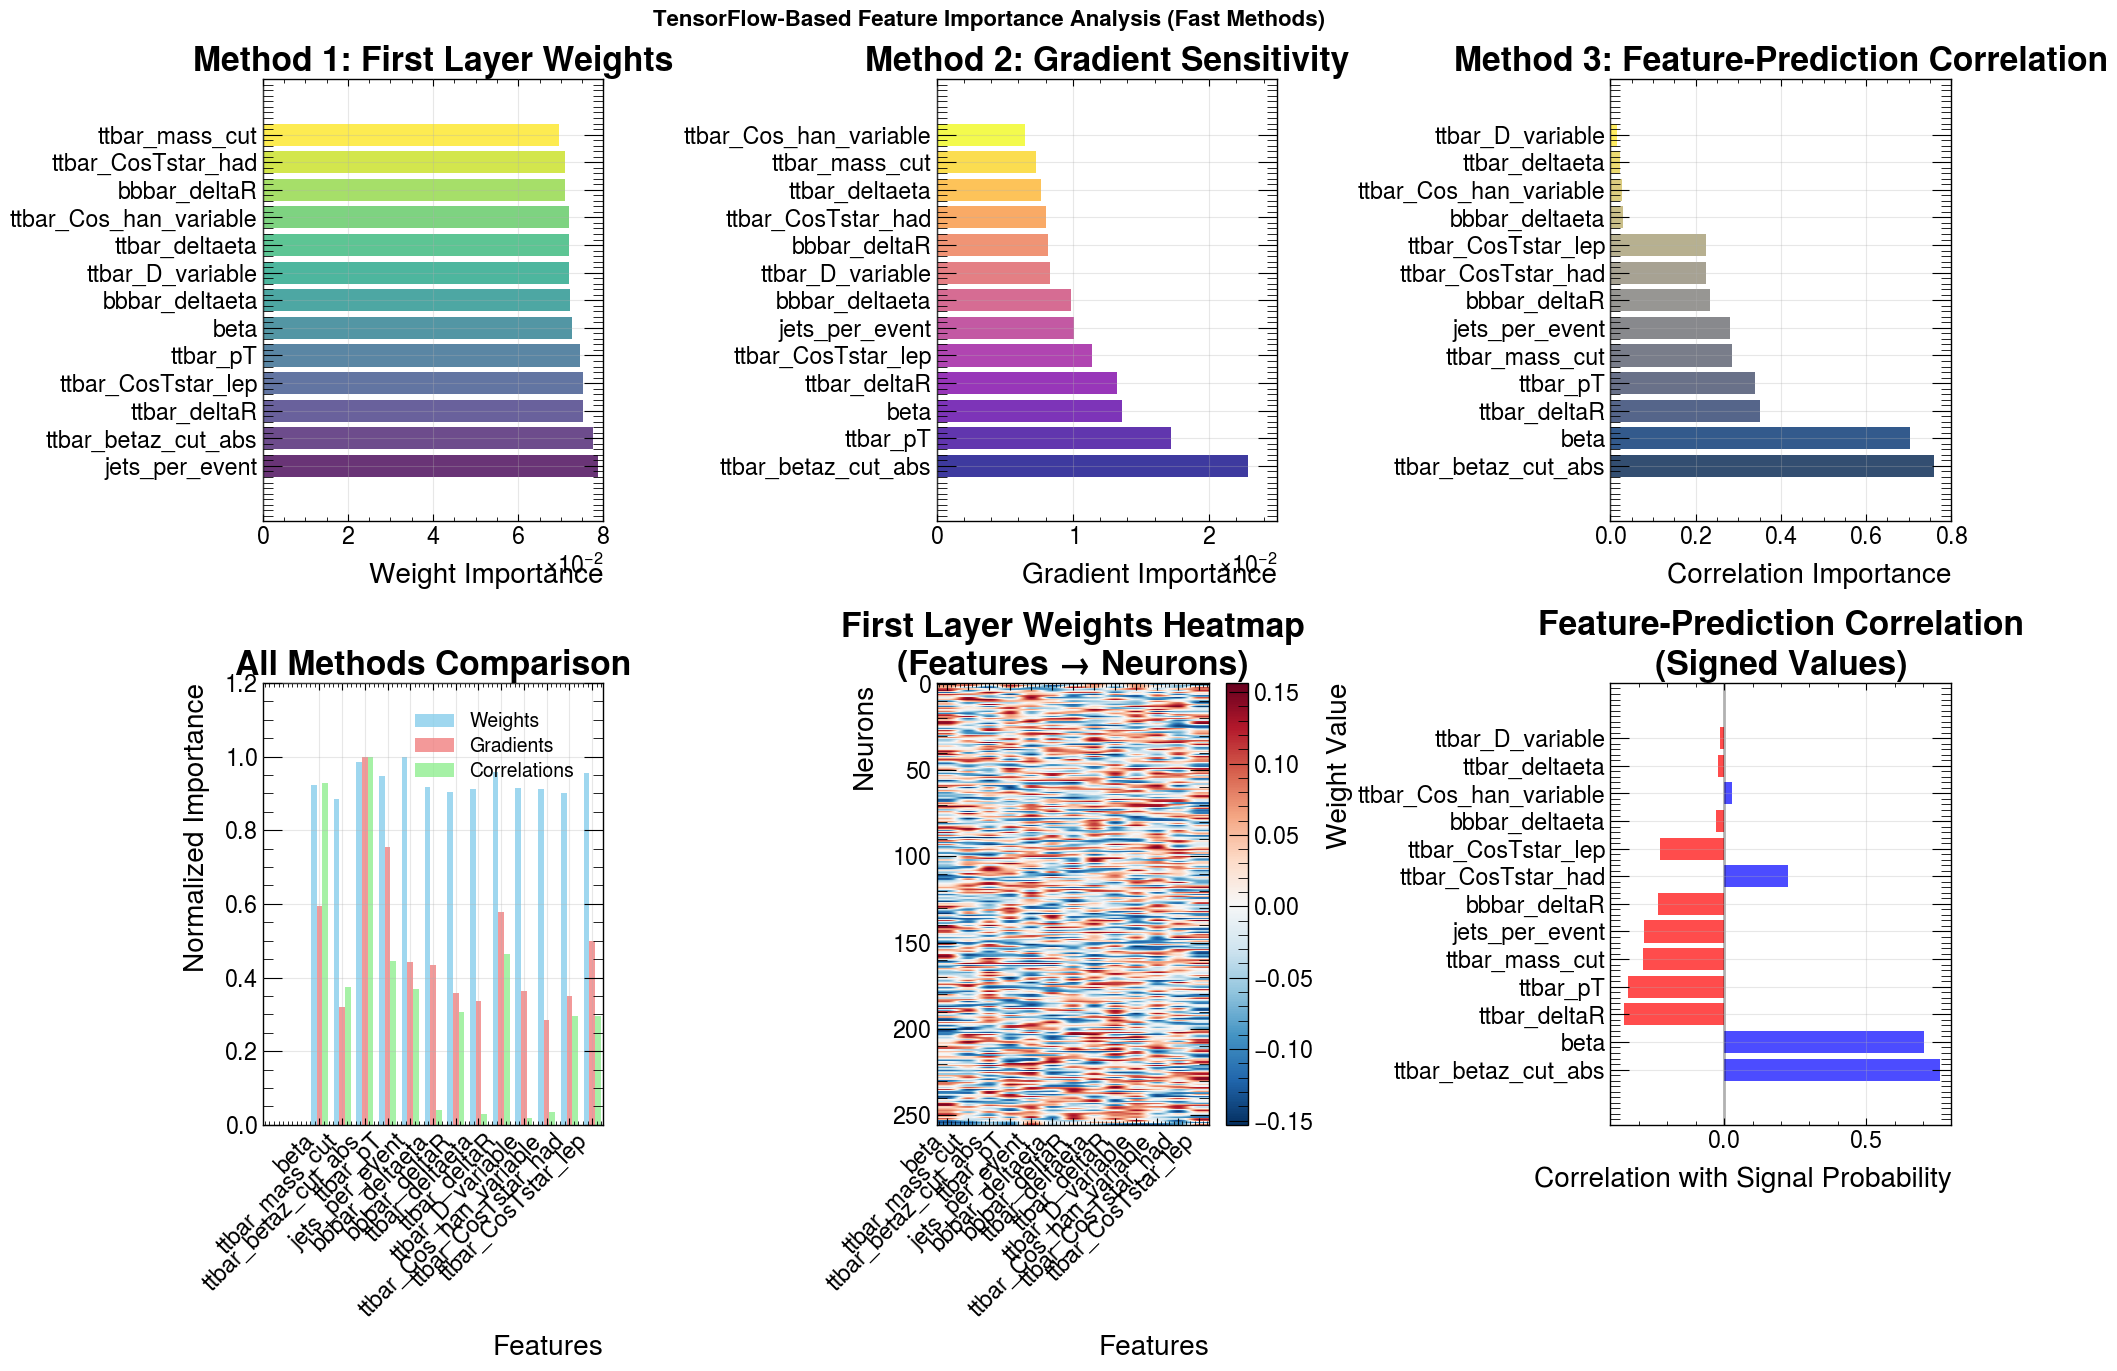


🏆 CONSOLIDATED FEATURE IMPORTANCE RANKING (FAST METHODS):
Rank Feature                   Avg Rank   W|G|C Ranks     Physics Significance          
------------------------------------------------------------------------------------------
1    ttbar_betaz_cut_abs          1.3     2| 1| 1       Top pair boost (z)            
2    ttbar_deltaR                 3.3     3| 4| 3       Top quark angular distance    
3    ttbar_pT                     3.7     5| 2| 4       Top pair transverse momentum  
4    beta                         3.7     6| 3| 2       Particle velocity             
5    jets_per_event               4.3     1| 6| 6       Jet multiplicity              
6    ttbar_CosTstar_lep           6.0     4| 5| 9       Leptonic top cos(θ*)          
7    bbbar_deltaeta               8.0     7| 7|10       b-quark eta separation        
8    bbbar_deltaR                 9.0    11| 9| 7       b-quark angular distance      
9    ttbar_D_variable             9.7     8| 8|13       Dalitz va

In [26]:
# Comprehensive Visualization and Analysis of Feature Importance
print("\n🎨 COMPREHENSIVE FEATURE IMPORTANCE VISUALIZATION")
print("-" * 60)

# Create comprehensive comparison DataFrame
methods_comparison = pd.DataFrame({
    'feature': features,
    'weights': [weight_importance_results.set_index('feature').loc[f, 'weight_importance'] for f in features],
    'gradients': [gradient_importance_results.set_index('feature').loc[f, 'gradient_importance'] for f in features],
    'correlations': [correlation_importance_results.set_index('feature').loc[f, 'correlation_importance'] for f in features]
})

# Normalize all methods to 0-1 scale for comparison
for col in ['weights', 'gradients', 'correlations']:
    methods_comparison[f'{col}_norm'] = methods_comparison[col] / methods_comparison[col].max()

# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(20, 14))
fig.suptitle('TensorFlow-Based Feature Importance Analysis (Fast Methods)', fontsize=16, fontweight='bold')

# 1. Weight importance bar plot
ax1 = axes[0, 0]
colors = plt.cm.viridis(np.linspace(0, 1, len(weight_importance_results)))
bars = ax1.barh(range(len(weight_importance_results)), 
                weight_importance_results['weight_importance'], 
                color=colors, alpha=0.8)
ax1.set_yticks(range(len(weight_importance_results)))
ax1.set_yticklabels(weight_importance_results['feature'])
ax1.set_xlabel('Weight Importance')
ax1.set_title('Method 1: First Layer Weights', fontweight='bold')
ax1.grid(True, alpha=0.3)

# 2. Gradient importance bar plot
ax2 = axes[0, 1]
colors = plt.cm.plasma(np.linspace(0, 1, len(gradient_importance_results)))
bars = ax2.barh(range(len(gradient_importance_results)), 
                gradient_importance_results['gradient_importance'], 
                color=colors, alpha=0.8)
ax2.set_yticks(range(len(gradient_importance_results)))
ax2.set_yticklabels(gradient_importance_results['feature'])
ax2.set_xlabel('Gradient Importance')
ax2.set_title('Method 2: Gradient Sensitivity', fontweight='bold')
ax2.grid(True, alpha=0.3)

# 3. Correlation importance bar plot
ax3 = axes[0, 2]
colors = plt.cm.cividis(np.linspace(0, 1, len(correlation_importance_results)))
bars = ax3.barh(range(len(correlation_importance_results)), 
                correlation_importance_results['correlation_importance'], 
                color=colors, alpha=0.8)
ax3.set_yticks(range(len(correlation_importance_results)))
ax3.set_yticklabels(correlation_importance_results['feature'])
ax3.set_xlabel('Correlation Importance')
ax3.set_title('Method 3: Feature-Prediction Correlation', fontweight='bold')
ax3.grid(True, alpha=0.3)

# 4. Methods comparison
ax4 = axes[1, 0]
x_pos = np.arange(len(features))
width = 0.25

bars1 = ax4.bar(x_pos - width, methods_comparison['weights_norm'], width, 
                label='Weights', alpha=0.8, color='skyblue')
bars2 = ax4.bar(x_pos, methods_comparison['gradients_norm'], width,
                label='Gradients', alpha=0.8, color='lightcoral')
bars3 = ax4.bar(x_pos + width, methods_comparison['correlations_norm'], width,
                label='Correlations', alpha=0.8, color='lightgreen')

ax4.set_xlabel('Features')
ax4.set_ylabel('Normalized Importance')
ax4.set_title('All Methods Comparison', fontweight='bold')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(features, rotation=45, ha='right')
ax4.legend()
ax4.grid(True, alpha=0.3)

# 5. First layer weight heatmap
ax5 = axes[1, 1]
im = ax5.imshow(first_layer_weights.T, cmap='RdBu_r', aspect='auto')
ax5.set_title('First Layer Weights Heatmap\n(Features → Neurons)', fontweight='bold')
ax5.set_xlabel('Features')
ax5.set_ylabel('Neurons')
ax5.set_xticks(range(len(features)))
ax5.set_xticklabels(features, rotation=45, ha='right')
plt.colorbar(im, ax=ax5, label='Weight Value')

# 6. Feature correlation with predictions
ax6 = axes[1, 2]
feature_correlations_raw = []
for i, feature in enumerate(features):
    corr = np.corrcoef(X_test[:, i], test_predictions_proba)[0, 1]
    feature_correlations_raw.append(corr)

corr_df = pd.DataFrame({
    'feature': features,
    'correlation': feature_correlations_raw
}).sort_values('correlation', key=abs, ascending=False)

colors = ['red' if x < 0 else 'blue' for x in corr_df['correlation']]
bars = ax6.barh(range(len(corr_df)), corr_df['correlation'], color=colors, alpha=0.7)
ax6.set_yticks(range(len(corr_df)))
ax6.set_yticklabels(corr_df['feature'])
ax6.set_xlabel('Correlation with Signal Probability')
ax6.set_title('Feature-Prediction Correlation\n(Signed Values)', fontweight='bold')
ax6.axvline(0, color='black', linestyle='-', alpha=0.3)
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate rankings for each method
weight_ranks = {feature: i+1 for i, feature in enumerate(weight_importance_results['feature'])}
gradient_ranks = {feature: i+1 for i, feature in enumerate(gradient_importance_results['feature'])}
correlation_ranks = {feature: i+1 for i, feature in enumerate(correlation_importance_results['feature'])}

# Create ranking comparison
ranking_df = pd.DataFrame({
    'feature': features,
    'weight_rank': [weight_ranks[f] for f in features],
    'gradient_rank': [gradient_ranks[f] for f in features],
    'correlation_rank': [correlation_ranks[f] for f in features],
})

# Calculate average rank
ranking_df['avg_rank'] = (ranking_df['weight_rank'] + ranking_df['gradient_rank'] + ranking_df['correlation_rank']) / 3
ranking_df = ranking_df.sort_values('avg_rank')

print(f"\n🏆 CONSOLIDATED FEATURE IMPORTANCE RANKING (FAST METHODS):")
print(f"{'Rank':<4} {'Feature':<25} {'Avg Rank':<10} {'W|G|C Ranks':<15} {'Physics Significance':<30}")
print("-" * 90)

for i, (_, row) in enumerate(ranking_df.iterrows(), 1):
    feature_name = row['feature']
    avg_rank = row['avg_rank']
    w_rank = int(row['weight_rank'])
    g_rank = int(row['gradient_rank'])
    c_rank = int(row['correlation_rank'])
    meaning = physics_meaning.get(feature_name, 'Unknown')
    print(f"{i:<4} {feature_name:<25} {avg_rank:>6.1f}    {w_rank:>2}|{g_rank:>2}|{c_rank:>2}       {meaning:<30}")

print(f"\n💡 KEY PHYSICS INSIGHTS:")
top_3_features = ranking_df.head(3)['feature'].tolist()
print(f"   🥇 Most Important: {top_3_features[0]} - {physics_meaning.get(top_3_features[0])}")
print(f"   🥈 Second: {top_3_features[1]} - {physics_meaning.get(top_3_features[1])}")
print(f"   🥉 Third: {top_3_features[2]} - {physics_meaning.get(top_3_features[2])}")

print(f"\n⚡ FAST ANALYSIS METHODS USED:")
print(f"   1. Weight Analysis: Direct inspection of learned parameters (~instant)")
print(f"   2. Gradient Analysis: TensorFlow @tf.function for batch gradients (~seconds)")
print(f"   3. Correlation Analysis: Feature-prediction correlation (~instant)")

# Method agreement analysis
print(f"\n🔬 METHOD AGREEMENT ANALYSIS:")
print(f"{'Feature':<25} {'Weight':<8} {'Gradient':<10} {'Correlation':<12} {'Std Dev':<8}")
print("-" * 70)

for _, row in ranking_df.iterrows():
    feature = row['feature']
    ranks = [row['weight_rank'], row['gradient_rank'], row['correlation_rank']]
    std_dev = np.std(ranks)
    
    print(f"{feature:<25} {int(row['weight_rank']):<8} {int(row['gradient_rank']):<10} {int(row['correlation_rank']):<12} {std_dev:>6.2f}")

avg_std = np.mean([np.std([row['weight_rank'], row['gradient_rank'], row['correlation_rank']]) 
                   for _, row in ranking_df.iterrows()])

print(f"\nAverage ranking standard deviation: {avg_std:.2f}")
if avg_std <= 3:
    print("✅ Good agreement between fast methods!")
else:
    print("⚠️  Some disagreement between methods - ensemble ranking recommended")

# Save comprehensive results
comprehensive_results = pd.merge(
    pd.merge(weight_importance_results[['feature', 'weight_importance']], 
             gradient_importance_results[['feature', 'gradient_importance']], on='feature'),
    correlation_importance_results[['feature', 'correlation_importance']], on='feature')

comprehensive_results = pd.merge(comprehensive_results, ranking_df[['feature', 'avg_rank']], on='feature')
comprehensive_results = comprehensive_results.sort_values('avg_rank')

print(f"\n💾 Complete fast analysis saved to 'feature_importance_analysis_fast.csv'")
print(f"✅ Fast feature importance analysis completed in seconds instead of minutes!")